In [27]:
from pre_processing import Pre_Process
from LDA import LDA,GensimLDA,LDA_DOCS
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
QA=Pre_Process('../business_text_mining/crawl_result/wineQ&A_text.json').clean_data()

In [3]:
D=Pre_Process().Check_date(QA)
print('VAR',D.var())
import chart_studio.plotly.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
layout1 = cf.Layout(
    height=500,
    width=1000
)
#D.iplot(kind='bar',colors='Red',layout=layout1)

VAR 45.29108991422661


컨텐츠의 최대 길이 : 2011
컨텐츠의 평균 길이 : 162.82191590086327


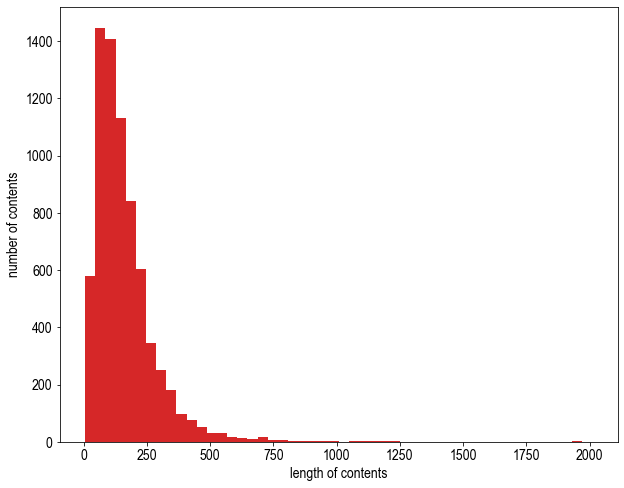

In [4]:
Pre_Process().show_contents_length(QA)

In [5]:
QA=Pre_Process().Get_unique_nouns(QA)

training was done. used memory 0.393 Gbry 0.263 Gb
all cohesion probabilities was computed. # words = 59465
all branching entropies was computed # words = 39925
all accessor variety was computed # words = 39925


100%|██████████| 7182/7182 [00:04<00:00, 1623.35it/s]


,0,1
91,없다,1378
454,싸다,1207
129,가격,1106
107,괜찮다,1042
221,추천,1026
...,...,...
4774,라크라사드,29
3937,비비다,29
3621,드셔보,29
930,대략,29


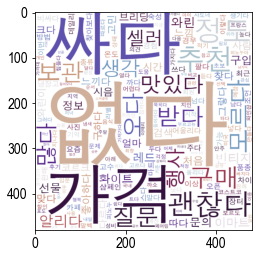

In [6]:
Pre_Process().Get_Nouns_Freq(QA,600,True)

In [17]:
import re
def get_text_with_word(word):
    l=re.findall('(ㅠㅠ)',word)
    L=re.findall('(ㅜㅜ)',word)
    i=re.findall('(\?\?)',word)
    return len(l)+len(i)+len(L)

In [18]:
QA['pain']=QA.contents.apply(lambda x :'pain' if get_text_with_word(x) != 0 else '')
PAIN=QA[QA.pain!='']

In [19]:
PAIN=QA[QA.pain!='']

,0,1
236,없다,471
177,괜찮다,324
422,싸다,323
35,정도,300
59,추천,270
...,...,...
204,혼자,20
1460,피노,20
607,마개,20
10,빼다,20


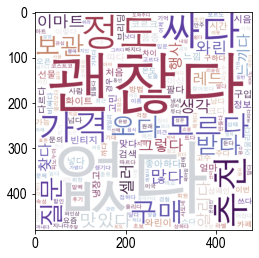

In [20]:
Pre_Process().Get_Nouns_Freq(PAIN,300,True)

# LDA

In [29]:
QA,topic_df=LDA_DOCS(QA,3)
_,lda,_=LDA(QA,3)

Topic 0
받다,선물,코르크,보관,브리딩,따다,모르다,오다,시간,이상,질문,처음,오픈,정도,다르다,없다,와린,사진,맞다,셀러
Topic 1
가격,싸다,괜찮다,행사,없다,문의,구매,빈티지,구하다,정보,정도,사람,구입,가능,판매,팔다,찾다,셀러,얼마,보관
Topic 2
추천,이마트,어울리다,화이트,시음,레드,좋아하다,알리다,맛있다,없다,샴페인,괜찮다,가격,마트,품종,장터,이번,고민,말다,차이
Topic 0
보관,화이트,레드,셀러,코르크,샴페인,없다,어울리다,느끼다,와린이,품종,느낌,모르다,정도,냉장고,질문,쓰다,그렇다,추천,좋아하다
Topic 1
추천,받다,싸다,행사,없다,선물,괜찮다,정보,오다,가격,검색,찾다,팔다,모르다,이마트,사람,판매,많다,마트,주다
Topic 2
가격,구매,정도,브리딩,문의,시음,싸다,괜찮다,알리다,빈티지,차이,가능,구입,조언,크다,시간,경험,장터,스다,얼마


In [33]:
lda.get_params()

{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 3,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': None,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [22]:
PAIN,P_topic_df=LDA_DOCS(PAIN,3)

Topic 0
보관,셀러,코르크,정도,따다,질문,와린,없다,넣다,시간,이상,오픈,냉장고,브리딩,남다,이렇다,방법,처음,온도,오다
Topic 1
가격,괜찮다,이마트,싸다,구매,행사,없다,알리다,빈티지,팔다,추천,사람,오다,판매,구입,구하다,장터,주다,마트,이번
Topic 2
추천,검색,받다,어울리다,모르다,레드,많다,다르다,없다,선물,품종,화이트,좋아하다,맛있다,차이,크다,이름,정보,종류,느낌


In [23]:
def closer_look(df, topic_num, contents,limit=40):
    each_topic_df = df[df['topic label'] == topic_num]
    DF=each_topic_df[['topic prob', '제목', '본문', '댓글','NOUNS']].sort_values(by='topic prob', ascending=False)
    return DF[contents][:limit]

In [25]:
#closer_look(QA,2,['제목'])
closer_look(PAIN,1,['제목'])

,제목
6972,가우디움 데저트윈드 파는곳 아시는분??
5434,마르께스 데 까사 콘차 블랙 타이에 대해 아시는분!
7164,구입가능한곳이요~
7149,미국 피노 고수님 계신가요? ^^;
5001,마트 행사관련 문자
3074,코스트코 와인 로드쇼 지점좀 알수 잇나요??ㅠ
6696,롱반 피노누아는 어디서 파나요??
1228,까시에로 델 디아블로(까쇼) 질문입니다.
5431,반품해야할까요?
1579,돔페리뇽 P2 2002와 함께 마실 피노누아 추천 부탁드립니다


In [43]:
QA.to_csv('LDA_QA.csv',encoding='utf-8')

# gensim

In [ ]:
vis=GensimLDA(QA,3)
pyLDAvis.display(vis)